# Estimativa de chegadas de turistas no Brasil em 2023 (atualizada em 2024)

## MEMBROS

URL DO BANCO ORIGINAL: https://onedrive.live.com/:x:/g/personal/24AE38B9DB3EE467/Eb6_G1nxSFRFnm5aaN0-P3cBs6YMgRBN1eCh_1LrFQlICA?resid=24AE38B9DB3EE467!s591bbfbe48f145549e6e5a68dd3e3f77&ithint=file%2Cxlsx&e=ckz1Yk&migratedtospo=true&redeem=aHR0cHM6Ly8xZHJ2Lm1zL3gvYy8yNGFlMzhiOWRiM2VlNDY3L0ViNl9HMW54U0ZSRm5tNWFhTjAtUDNjQnM2WU1nUkJOMWVDaF8xTHJGUWxJQ0E_ZT1ja3oxWWs

In [5]:
!pip install gdown
import gdown
import io
import sqlite3
import pandas as pd

In [7]:
url = "https://drive.google.com/uc?export=download&id=1l60T97B1rQD-pxqZ0A234BQMVsmjCQtE"
output = 'tabela.sql'
gdown.download(url, output, quiet=False)


conn = sqlite3.connect('chegadassdb')
cursor = conn.cursor()

with io.open('tabela.sql', 'r', encoding='utf-8') as f:
    sql = f.read()

cursor.executescript(sql)

Downloading...
From: https://drive.google.com/uc?export=download&id=1l60T97B1rQD-pxqZ0A234BQMVsmjCQtE
To: C:\Users\Rafael\tabela.sql
100%|█████████████████████████████████████████████████████████████████████████████| 8.11M/8.11M [00:00<00:00, 37.7MB/s]


In [9]:
query="""
CREATE TABLE Continente (
    cod_continente INT PRIMARY KEY,
    nome VARCHAR(50) NOT NULL,
    hemisferio VARCHAR(100)

);
"""
cursor.execute(query)


In [11]:
query="""
CREATE TABLE Pais (
    cod_pais INT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    cod_continente INT NOT NULL,
    FOREIGN KEY (cod_continente) REFERENCES Continente (cod_continente)
);
"""
cursor.execute(query)


In [13]:
query="""
CREATE TABLE Unidade_Federativa (
    cod_uf INT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL
);
"""
cursor.execute(query)


In [15]:
query="""
CREATE TABLE Pais_Unidade_Federativa (
	cod_pais INT NOT NULL,
	cod_uf INT NOT NULL,
	PRIMARY KEY (cod_pais, cod_uf),
	FOREIGN KEY (cod_pais) REFERENCES Pais (cod_pais),
	FOREIGN KEY (cod_uf) REFERENCES Unidade_Federativa (cod_uf)
);
"""
cursor.execute(query)


In [17]:
query="""
CREATE TABLE Via (
    cod_via INT PRIMARY KEY,
    nome VARCHAR(50) NOT NULL
);
"""
cursor.execute(query)


In [19]:
query="""
CREATE TABLE Mes (
    cod_mes INT PRIMARY KEY,
    nome VARCHAR(50) NOT NULL,
    estacao VARCHAR(50)
);
"""
cursor.execute(query)


In [21]:
query="""
CREATE TABLE Chegada (
    id_chegada INT PRIMARY KEY,
    ano INT NOT NULL,
    cod_mes VARCHAR(20) NOT NULL,
    cod_via INT NOT NULL,
    quantidade INT NOT NULL,
    cod_pais INT NOT NULL,
    cod_uf INT NOT NULL,
    FOREIGN KEY (cod_via) REFERENCES Via (cod_via),
    FOREIGN KEY (cod_pais) REFERENCES Pais (cod_pais),
    FOREIGN KEY (cod_uf) REFERENCES Unidade_Federativa (cod_uf)
);
"""
cursor.execute(query)


FIZEMOS A LEITURA DAS MAIS DE 34 MIL LINHAS DE INSERT DA TABELA ORIGINAL


AGORA VAMOS PREENCHER AS TABELAS DO RELACIONAL USANDO A TABELA:


In [28]:
query="""
INSERT INTO Continente (cod_continente, nome)
SELECT DISTINCT cod_continente, Continente FROM Tabela;
"""
cursor.execute(query)



In [30]:
query1="""
UPDATE Continente
SET hemisferio = 'Norte'
WHERE nome IN ('America Central e Caribe', 'America do Norte', 'Asia', 'Europa');
"""
cursor.execute(query1)

In [32]:
query2="""
UPDATE Continente
SET hemisferio = 'Sul'
WHERE nome IN ('Africa', 'America do sul', 'Oceania');
"""

cursor.execute(query2)


In [34]:
query="""
INSERT INTO Mes (cod_mes, nome)
SELECT DISTINCT cod_mes, Mes FROM Tabela;
"""
cursor.execute(query)

In [36]:
query0="""
UPDATE Mes
SET estacao = 'Inverno'
WHERE nome IN ('Julho', 'Agosto', 'Setembro');
"""
cursor.execute(query0)

In [38]:
query1="""
UPDATE Mes
SET estacao = 'Primavera'
WHERE nome IN ('Outubro', 'Novembro', 'Dezembro');
"""
cursor.execute(query1)

In [40]:
query2="""
UPDATE Mes
SET estacao = 'Outono'
WHERE nome IN ('Abril', 'Maio', 'Junho');
"""
cursor.execute(query2)

In [42]:
query3="""
UPDATE Mes
SET estacao = 'Verao'
WHERE nome IN ('Janeiro', 'Fevereiro', 'Marco');

"""
cursor.execute(query3)

In [44]:
query="""
INSERT INTO Pais (cod_pais, nome, cod_continente)
SELECT DISTINCT cod_pais, Pais, cod_continente FROM Tabela;
"""
cursor.execute(query)


In [46]:
query="""
INSERT INTO Unidade_Federativa (cod_uf, nome)
SELECT DISTINCT cod_uf, UF FROM Tabela;
"""
cursor.execute(query)


In [48]:
query="""
INSERT INTO Pais_Unidade_Federativa (cod_pais, cod_uf)
SELECT DISTINCT cod_pais, cod_uf
FROM Tabela
WHERE cod_pais IS NOT NULL AND cod_uf IS NOT NULL;
"""
cursor.execute(query)


In [50]:
query="""
INSERT INTO Via (cod_via, nome)
SELECT DISTINCT cod_via, Via FROM Tabela;
"""
cursor.execute(query)


In [52]:
query="""
INSERT INTO Chegada (ano, cod_mes, cod_via, quantidade, cod_pais, cod_uf)
SELECT ano, cod_mes, cod_via, Chegadas, cod_pais, cod_uf FROM Tabela;
"""
cursor.execute(query)


AGORA AS TABELAS ESTÃO SALVAS E PREENCHIDAS.
O ESQUEMA RELACIONAL MONTADO SE ENCONTRA NA TERCEIRA FORMA NORMALIZADA


In [ ]:
#SELECTS PARA VER AS TABELAS
Continente="""SELECT * FROM Continente"""
Pais="""SELECT * FROM Pais"""
Mes="""SELECT * FROM Mes"""
Unidade_Federativa="""SELECT * FROM Unidade_Federativa"""
Via="""SELECT * FROM Via"""
Chegada="""SELECT * FROM Chegada"""
#digite o nome da tabela que quer visualizar no df abaixo 
df = pd.read_sql_query(,conn)
df

A PARTIR DESTE PONTO O ESQUEMA RELACIONAL ESTÁ PRONTO, NA TERCEIRA FORMA NORMALIZADA, COM AO MENOS 4 ENTIDADES COM 2 OU MAIS ATRIBUTOS (FORA A PK) E UMA RELAÇÃO M:N

## DIAGRAMA ER

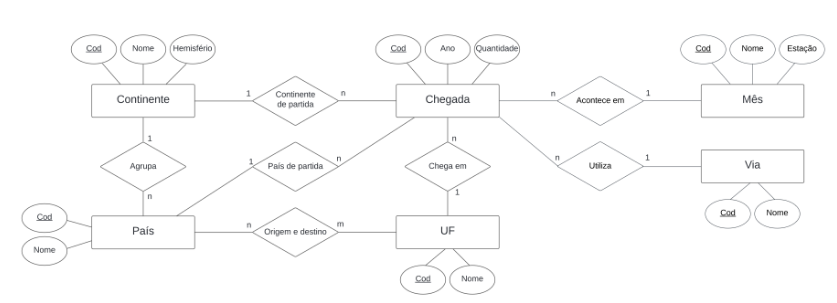

## DIAGRAMA RELACIONAL

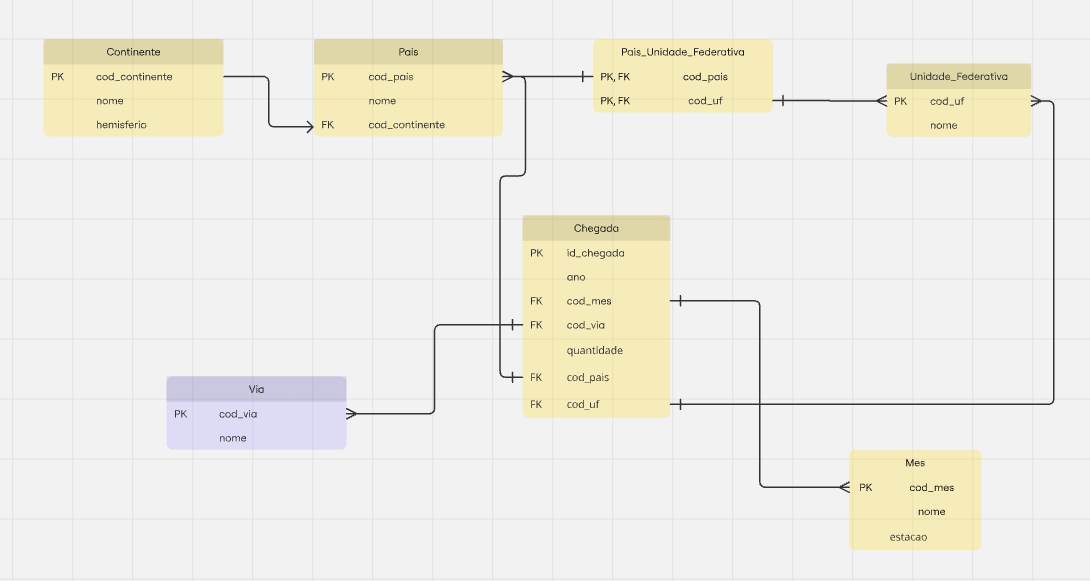

## CONSULTAS

* **2	consultas	envolvendo	as	operações	de	seleção	e	projeção**

*1-seleciona os meses em que a estação do ano é verão*

In [64]:
query="""
SELECT 
	nome
FROM
	Mes
WHERE
	estacao = 'Verao'
"""
df = pd.read_sql_query(query,conn)
df

,nome
0,Janeiro
1,Fevereiro
2,Marco


*2-seleciona os continentes que estão situados no hemisfério norte*

In [67]:
query="""
SELECT
	nome
FROM
	Continente
WHERE
	hemisferio = 'Norte'
"""
df = pd.read_sql_query(query,conn)
df

,nome
0,Asia
1,Europa
2,America do Norte
3,America Central e Caribe


* **3	consultas	envolvendo	a	junção	de	duas	relações;**

*3-seleciona o nome do país e do continente dos países que compõe o hemisfério norte*
	

In [71]:
query="""
SELECT DISTINCT

		p.nome, c.nome
	FROM
		Pais as p
	JOIN
		Continente as c ON p.cod_continente = c.cod_continente
	WHERE
		c.hemisferio = 'Norte'
    ORDER BY c.nome
        """
df = pd.read_sql_query(query,conn)
df

,nome,nome
0,Cuba,America Central e Caribe
1,Honduras,America Central e Caribe
2,Outros paises,America Central e Caribe
3,Costa Rica,America Central e Caribe
4,El Salvador,America Central e Caribe
...,...,...
61,Croacia,Europa
62,Estonia,Europa
63,Letonia,Europa
64,Turquia,Europa


*4-seleciona o nome das unidades federativas em que mais de 10000 turistas chegaram no ano*
	

In [74]:
query="""
SELECT DISTINCT
		uf.nome
	FROM
		Unidade_Federativa as uf
	JOIN
		Chegada as c ON  uf.cod_uf = c.cod_uf
	WHERE
		c.quantidade > 10000
        """
df = pd.read_sql_query(query,conn)
df

,nome
0,Rio de Janeiro
1,Santa Catarina
2,S�o Paulo
3,Mato Grosso do Sul
4,Paran�
5,Rio Grande do Sul


*5-seleciona o nome das vias (meio de chegada) em que mais de 30000 chegadas foram realizadas*

In [77]:
query="""
SELECT DISTINCT
		v.nome
	FROM
		Via as v
	JOIN
		Chegada as c ON v.cod_via = c.cod_via
	WHERE
		c.quantidade > 30000
"""
df = pd.read_sql_query(query,conn)
df

,nome
0,Aereo
1,Terrestre


* **3	consultas	envolvendo	a	junção	de	três	ou	mais	relações**

*6-o mes e a quantidade de turistas que chegaram via terreste
		--hipotese: 4/11 teve final da libertadores boca x flu, por isso muitos turistas (argentinos) nessa data*

In [81]:
query="""
SELECT DISTINCT
 
			m.nome,
			COUNT(c.quantidade) as qtd
		FROM
			Mes as m
		JOIN
			Chegada as c ON m.cod_mes = c.cod_mes
		JOIN
			Via as v ON c.cod_via = v.cod_via
		WHERE
			v.nome = 'Terrestre'
		GROUP BY
			m.nome
		ORDER BY
			qtd DESC
"""
df = pd.read_sql_query(query,conn)
df

,nome,qtd
0,Novembro,1402
1,Outubro,1378
2,Dezembro,1316
3,Abril,829
4,Agosto,816
5,Julho,803
6,Setembro,792
7,Maio,790
8,Junho,770
9,Janeiro,762


*Essa consulta prova nossa hipotese sobre a final da liberta*

In [84]:
query="""
    SELECT DISTINCT
 
		m.nome,
		COUNT(c.quantidade) as qtd,
		p.nome
	FROM
		Mes as m
	JOIN
			Chegada as c ON m.cod_mes = c.cod_mes
	JOIN
		Via as v ON c.cod_via = v.cod_via
	JOIN
		Pais as p ON c.cod_pais = p.cod_pais
	WHERE
			v.nome = 'Terrestre'
	GROUP BY
			m.nome, p.nome
	ORDER BY
		qtd DESC
    LIMIT 15
"""
df = pd.read_sql_query(query,conn)
df

,nome,qtd,nome
0,Novembro,122,Outros paises
1,Outubro,106,Outros paises
2,Dezembro,103,Outros paises
3,Setembro,84,Outros paises
4,Agosto,73,Outros paises
5,Maio,66,Outros paises
6,Janeiro,65,Outros paises
7,Abril,64,Outros paises
8,Julho,63,Outros paises
9,Junho,59,Outros paises


*7-os 10 Paises que mais enviaram turistas pra Pernambuco*

In [87]:
query="""
SELECT DISTINCT
 
			p.nome,
			COUNT(c.quantidade) as qtd
		FROM
			Pais as p
		JOIN
			Chegada as c ON p.cod_pais = c.cod_pais
		JOIN
			Unidade_Federativa as uf ON c.cod_uf = uf.cod_uf
		WHERE
			uf.nome = 'Pernambuco' AND
            p.nome != 'Outros paises'
		GROUP BY
			p.nome
		ORDER BY
			qtd DESC
        LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df

,nome,qtd
0,Franca,48
1,Estados Unidos,41
2,Alemanha,41
3,Reino Unido,39
4,Argentina,35
5,Italia,33
6,Espanha,33
7,Africa do Sul,33
8,Su��a,32
9,Holanda,32


*8-listar os paises que tiveram mais de 80 turistas no Brasil em novembro*

In [90]:
query="""
SELECT DISTINCT

			p.nome,
			COUNT(c.quantidade) as qtd
		FROM
			Pais as p
		JOIN
			Chegada as c ON p.cod_pais = c.cod_pais
		JOIN
			Mes as m ON c.cod_mes = m.cod_mes
		WHERE
			m.nome = 'Novembro'AND
            p.nome != 'Outros paises'
		GROUP BY
			p.nome
		HAVING
			COUNT(c.quantidade) > 80
		ORDER BY
			qtd DESC
"""
df = pd.read_sql_query(query,conn)
df

,nome,qtd
0,Argentina,112
1,Alemanha,102
2,Franca,96
3,Estados Unidos,92
4,Peru,89
5,Espanha,88
6,Colombia,84
7,Uruguai,82
8,Paraguai,82
9,Chile,82


* **2 consultas	envolvendo	funções	de	agregação	sobre	o	resultado	da	junção	de	pelo	menos	duas	relações.**

*9-selecionar as unidades federativas e a quantidade de estrangeiros que elas receberam para mais de 2000 chegadas*

In [94]:
query="""
SELECT DISTINCT
			uf.nome, 
			COUNT(c.quantidade) AS qtd
		FROM
			Unidade_Federativa as uf
		JOIN
			Chegada as c ON uf.cod_uf = c.cod_uf
		JOIN
			Pais as p ON c.cod_pais = p.cod_pais
		JOIN
			Continente as co ON p.cod_continente = co.cod_continente
		GROUP BY
			uf.nome
		HAVING
			COUNT(c.quantidade) > 2000
        ORDER BY qtd DESC
"""
df = pd.read_sql_query(query,conn)
df

,nome,qtd
0,S�o Paulo,4816
1,Rio Grande do Sul,4806
2,Paran�,4420
3,Rio de Janeiro,3140


*10-qual a estacao que teve o maior numero de chegadas de turistas vindos do hemisferio norte*

In [97]:
query="""
SELECT DISTINCT
			m.estacao,
			COUNT(c.quantidade) as qtd
		FROM
			Mes as m
		JOIN
			Chegada as c ON m.cod_mes = c.cod_mes
		JOIN
			Pais as p ON c.cod_pais = p.cod_pais
		JOIN
			Continente as co ON p.cod_continente = co.cod_continente
		GROUP BY
			m.estacao
		ORDER BY
			qtd DESC
        LIMIT 1
"""
df = pd.read_sql_query(query,conn)
df

,estacao,qtd
0,Primavera,13854
